In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('dark_background')


# Expoloratory Data Analysis - Porcine kidneys timeseries proteomics
## Reading in the data
### Reading the metadata 

In [223]:
metadata = pd.read_excel("../data/PRE-IMAGE Proteomics samples.xlsx")
metadata.head()

,Sample number,Histology code,Timepoint,Treatment,Notes,Tissue weight (mg),Amount lysis buffer added (ul),protein concentration (ug/mL),Total protein amount,Needed for 100 ug PROT (uL),Topup buffer (uL) PROT,Needed for 110 ug PROT (uL),Topup buffer (uL) PROT.1,Amount lysis buffer left,Total protein amount.1,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,D830,In vivo,0,NaN,NaN,200.0,5580.000000,NaN,17.921147,32.078853,19.713262,35.286738,150,837,894.966667,NaN,180.286738,1006.0
1,2,D830,-10,0,NaN,NaN,200.0,4846.666667,NaN,20.632737,29.367263,22.696011,32.303989,150,727.0,NaN,NaN,NaN,NaN
2,3,D830,60,0,NaN,NaN,400.0,4580.000000,NaN,21.834061,28.165939,24.017467,30.982533,350,1603.0,NaN,NaN,NaN,NaN
3,4,D830,120,0,NaN,NaN,100.0,6746.666667,NaN,14.822134,35.177866,16.304348,38.695652,50,337.333333,NaN,NaN,NaN,NaN
4,5,D830,180,0,NaN,NaN,150.0,3813.333333,NaN,26.223776,23.776224,28.846154,26.153846,100,381.333333,NaN,NaN,NaN,NaN


### Reading the Proteomics data

In [224]:
proteomics = pd.read_csv("../data/normalized data proteomics.csv", sep=";", engine="python", decimal=",")
proteomics.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X350,X351,X352,X353,X354,T: Protein.Group,T: Protein.Ids,T: Protein.Names,T: Genes,T: First.Protein.Description
0,1.69303,0.201225,-1.069070,-0.783859,-0.453376,-0.372368,1.633730,0.682071,0.049931,-0.192513,...,0.245756,-2.960640,-3.349300,-3.995960,-4.305920,A0A075B7H9,A0A075B7H9,A0A075B7H9_PIG,NaN,Ig-like domain-containing protein
1,-2.69854,-1.773330,-1.081820,-1.737290,-1.618430,-2.363990,-2.125340,-2.172870,-0.970062,-1.458950,...,-1.190200,-1.041840,-0.065981,-2.860330,-2.134220,A0A075B7I5,A0A075B7I5,A0A075B7I5_PIG,NaN,Ig-like domain-containing protein
2,2.52311,1.181940,1.002280,0.179695,0.222697,-0.308817,2.035500,1.323660,0.621907,0.996573,...,2.297890,1.382260,0.458403,0.477923,-0.178849,A0A075B7I6,A0A075B7I6,A0A075B7I6_PIG,NaN,Ig-like domain-containing protein
3,1.79447,0.660887,-0.585669,-1.467700,-2.507180,-0.612259,0.690125,0.164255,-1.230270,-0.335730,...,0.910434,-0.311479,-1.362980,-2.649430,-2.486740,A0A075B7I6;A0A287BMT4,A0A075B7I6;A0A287BMT4,A0A075B7I6_PIG;A0A287BMT4_PIG,NaN,Ig-like domain-containing protein
4,2.32785,1.337540,-0.812640,0.627483,1.060930,1.924210,3.023120,2.300790,1.156620,0.897962,...,1.237530,0.184288,0.383790,0.214839,0.329414,A0A075B7I9,A0A075B7I9,A0A075B7I9_PIG,NaN,Ig-like domain-containing protein


The last columns of the proteomics dataset are discriptors of the expressed gene and it's gene family. These columns will be removed from the main data and stored in a seperate dataframe.

In [225]:
protein_information = proteomics.iloc[:,-5:]
proteomics.drop(columns=proteomics.iloc[:,-5:], inplace=True)

In [226]:
display(protein_information.head(), proteomics.head(), proteomics.dtypes)

,T: Protein.Group,T: Protein.Ids,T: Protein.Names,T: Genes,T: First.Protein.Description
0,A0A075B7H9,A0A075B7H9,A0A075B7H9_PIG,NaN,Ig-like domain-containing protein
1,A0A075B7I5,A0A075B7I5,A0A075B7I5_PIG,NaN,Ig-like domain-containing protein
2,A0A075B7I6,A0A075B7I6,A0A075B7I6_PIG,NaN,Ig-like domain-containing protein
3,A0A075B7I6;A0A287BMT4,A0A075B7I6;A0A287BMT4,A0A075B7I6_PIG;A0A287BMT4_PIG,NaN,Ig-like domain-containing protein
4,A0A075B7I9,A0A075B7I9,A0A075B7I9_PIG,NaN,Ig-like domain-containing protein


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X357,X358,X359,X360,X349,X350,X351,X352,X353,X354
0,1.69303,0.201225,-1.069070,-0.783859,-0.453376,-0.372368,1.633730,0.682071,0.049931,-0.192513,...,-0.328824,-3.342750,-1.517470,-0.364442,0.686068,0.245756,-2.960640,-3.349300,-3.995960,-4.305920
1,-2.69854,-1.773330,-1.081820,-1.737290,-1.618430,-2.363990,-2.125340,-2.172870,-0.970062,-1.458950,...,-0.925811,-2.218610,-1.405590,0.007368,0.807579,-1.190200,-1.041840,-0.065981,-2.860330,-2.134220
2,2.52311,1.181940,1.002280,0.179695,0.222697,-0.308817,2.035500,1.323660,0.621907,0.996573,...,0.428776,-0.421342,-0.968625,-0.621481,-0.671886,2.297890,1.382260,0.458403,0.477923,-0.178849
3,1.79447,0.660887,-0.585669,-1.467700,-2.507180,-0.612259,0.690125,0.164255,-1.230270,-0.335730,...,-0.931460,-0.059160,-1.165710,0.475415,0.595263,0.910434,-0.311479,-1.362980,-2.649430,-2.486740
4,2.32785,1.337540,-0.812640,0.627483,1.060930,1.924210,3.023120,2.300790,1.156620,0.897962,...,-0.580385,-1.593910,-0.273934,-0.503628,-0.074142,1.237530,0.184288,0.383790,0.214839,0.329414


X1      float64
X2      float64
X3      float64
X4      float64
X5      float64
         ...   
X350    float64
X351    float64
X352    float64
X353    float64
X354    float64
Length: 353, dtype: object

In [227]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
d_red = pca.fit_transform(proteomics.T)

In [228]:
mu = d_red.var(axis=0)
pct = mu / mu.sum() * 100
cpct = pct.sum()

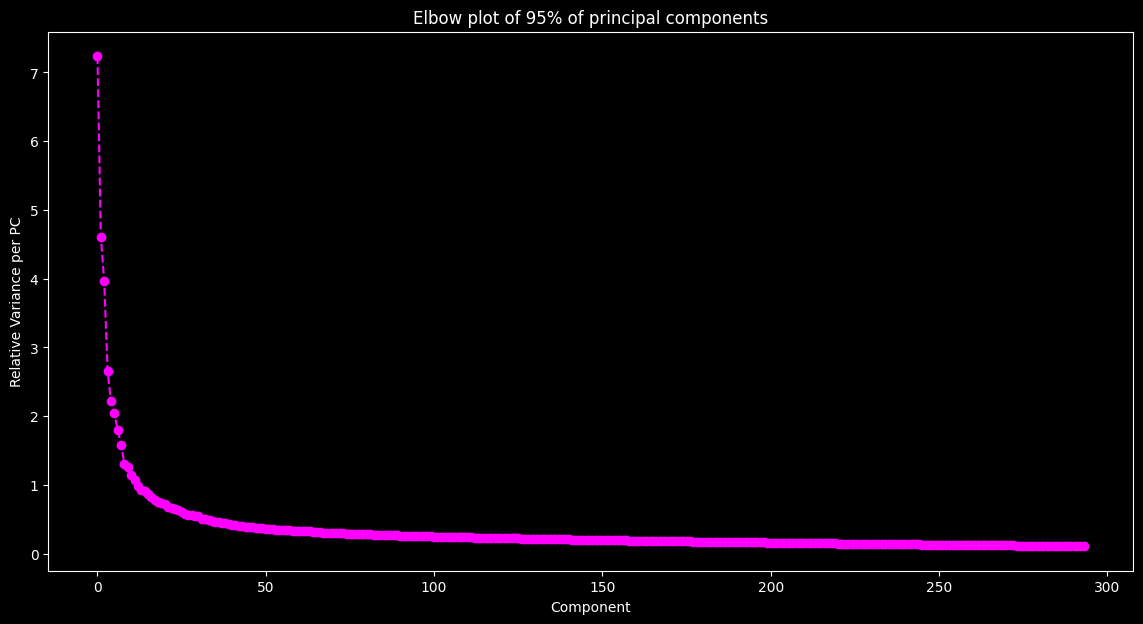

Total percentage: 100.00%


In [229]:
plt.figure(figsize=(14,7))
plt.title("Elbow plot of 95% of principal components")
plt.ylabel("Relative Variance per PC")
plt.xlabel("Component")
plt.plot(pct, "o--", color='magenta')
plt.show()
print(f"Total percentage: {cpct :.2f}%")

In [230]:
proteomics.shape

(8609, 353)

In [231]:
proteomics.T

,0,1,2,3,4,5,6,7,8,9,...,8599,8600,8601,8602,8603,8604,8605,8606,8607,8608
X1,1.693030,-2.698540,2.523110,1.794470,2.327850,2.255520,0.559152,-0.228044,0.262774,-0.118418,...,0.089587,-0.121453,-0.105425,0.413570,-0.687626,0.072036,0.058775,-0.089381,0.305729,-0.158002
X2,0.201225,-1.773330,1.181940,0.660887,1.337540,0.715348,0.169509,-0.243262,-0.073108,-0.171513,...,-0.281930,-0.198985,-0.204766,0.475287,0.094841,0.050149,-0.001205,-0.104091,0.363517,-0.217804
X3,-1.069070,-1.081820,1.002280,-0.585669,-0.812640,0.345834,-0.246474,-0.134219,-0.145110,0.084289,...,-0.301136,0.686632,0.189002,0.143699,0.646849,0.199199,0.227230,-0.199138,0.226860,-0.049738
X4,-0.783859,-1.737290,0.179695,-1.467700,0.627483,0.292191,-0.319267,0.191195,-0.225821,-0.622699,...,0.252702,-0.042098,0.223450,-0.264030,1.496440,0.280998,0.216939,-0.048797,0.008935,-0.223703
X5,-0.453376,-1.618430,0.222697,-2.507180,1.060930,1.762640,-0.835856,-0.264771,0.264963,0.180423,...,-0.066912,0.005170,0.241266,0.078953,-0.517354,-0.071836,-0.048169,0.442324,0.532827,-0.275102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X350,0.245756,-1.190200,2.297890,0.910434,1.237530,-0.697949,-0.216880,-0.060574,-0.046269,0.207848,...,-0.096913,0.505879,-1.111440,-0.447593,0.965116,0.130039,-0.196245,-0.193486,-0.697148,-0.046416
X351,-2.960640,-1.041840,1.382260,-0.311479,0.184288,-0.740033,-0.592256,0.237638,-0.132512,-0.944155,...,-0.947441,0.249513,-0.287423,-1.011450,1.364720,0.137905,-0.154999,-0.747429,-1.172100,0.346906
X352,-3.349300,-0.065981,0.458403,-1.362980,0.383790,-2.064770,0.011799,0.397057,0.561435,-1.190790,...,-0.838047,-1.211070,-0.807817,0.002880,-0.282839,-0.036737,-0.384567,0.709170,-0.983825,-0.289016
X353,-3.995960,-2.860330,0.477923,-2.649430,0.214839,-1.676370,-0.077252,0.013474,0.050428,0.083370,...,-0.096005,0.108870,0.429459,-0.706303,-0.072224,0.220600,-0.023713,-0.117797,-0.276611,-0.226198


In [232]:
d_red.shape

(353, 294)

In [233]:
# metadata[["Histology code", "Timepoint"]].to_csv("../data/cleaned_data/samples.csv")

In [234]:
samples = pd.read_csv("../data/cleaned_data/samples.csv")

In [235]:
category_codes, category_names = pd.factorize(samples["Timepoint"])

In [236]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [237]:
cmap = cm.get_cmap('Set3', 7)

C:\Users\GrayJ\AppData\Local\Temp\ipykernel_30828\3122725023.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set3', 7)


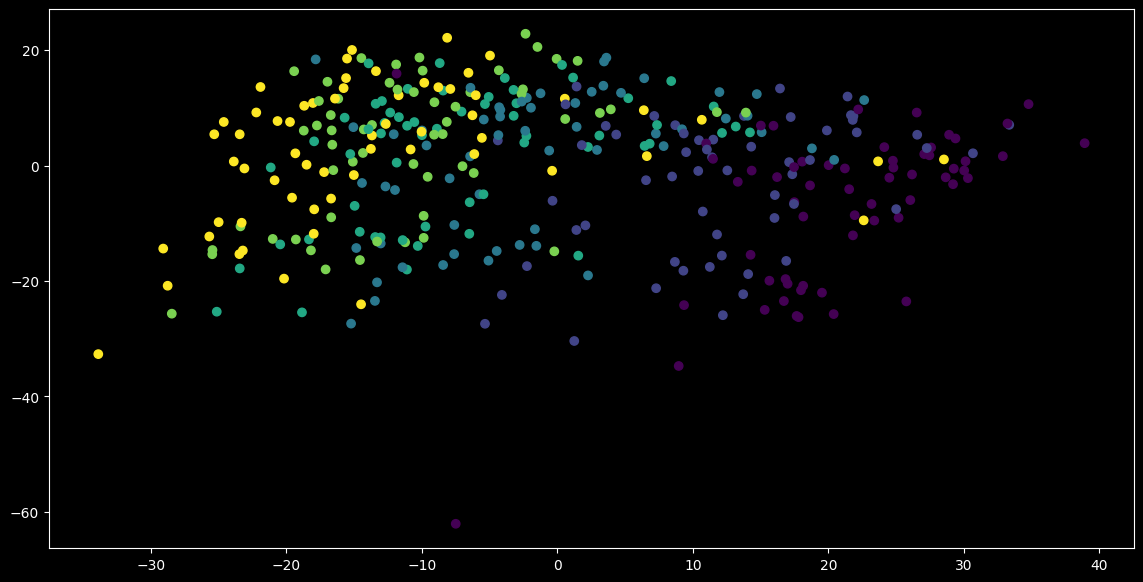

In [238]:
plt.figure(figsize=(14,7))
plt.scatter(d_red[:,0], d_red[:,1], c=category_codes)
plt.show()

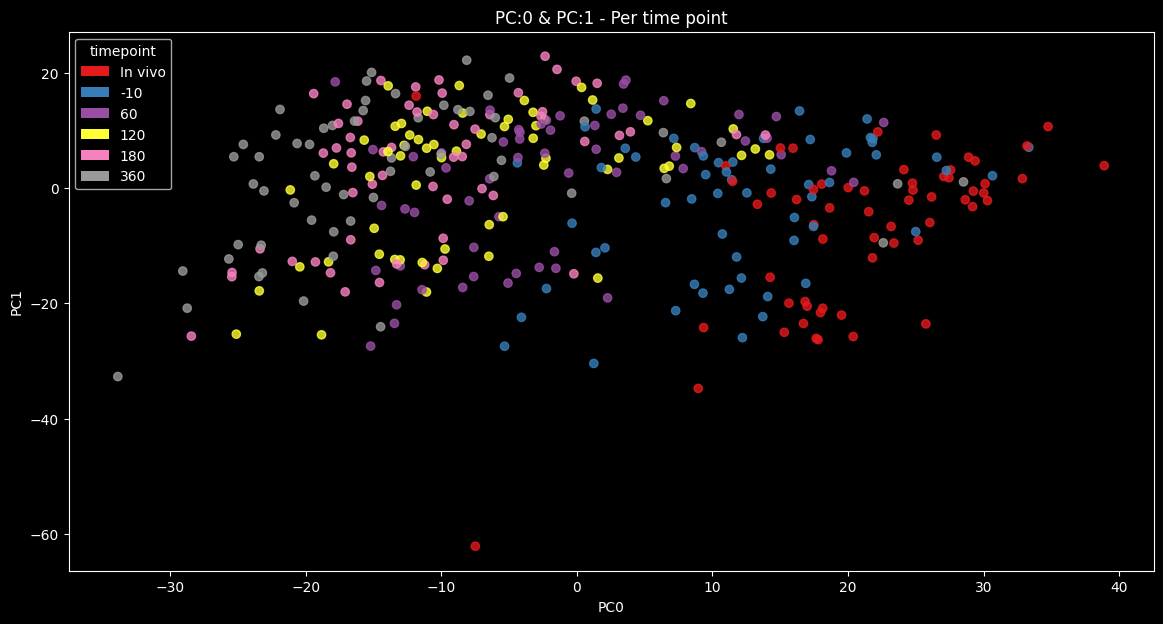

In [239]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(14,7))

scatter = ax.scatter(
    d_red[:,0], d_red[:,1], c=category_codes,
    alpha=0.8,
    cmap="Set1"
)
handles = [Patch(facecolor=scatter.cmap(scatter.norm(i)), label=label) for i, label in enumerate(category_names)]
ax.legend(handles=handles, title="timepoint")
ax.set_xlabel("PC0")
ax.set_ylabel("PC1")
ax.set_title("PC:0 & PC:1 - Per time point")
plt.show()